# Analyzing Ireland's Employment Landscape (2006-2011)
## A Data Analytics Journey Through the Economic Downturn

### Introduction
Hi! Welcome to my university data analytics project. Here, I'll take you through my analysis of Ireland's employment data during one of its most challenging economic periods - the years following the 2008 financial crisis. A significant portion of this project involved extensive data cleaning and reshaping of CSO datasets.

### Why This Project Matters
The 2006-2011 period in Ireland tells a fascinating story of economic transformation. As a data analytics student, this project was particularly valuable because it combined:
- Complex data cleaning and reshaping challenges
- Real-world untidy data
- Multiple time periods and categorical variables
- Opportunities for meaningful insights from raw data

### Project Goals
Through this analysis, I aimed to:
1. 🧹 Transform messy employment data into analysis-ready format
2. 🔄 Reshape wide-format employment data into tidy structure
3. 🎯 Understand how different industries were affected by the economic downturn
4. 🔍 Investigate gender balance across various sectors
5. 📊 Compare employment patterns between cities and rural areas

### Tools & Skills Used
This project helped me develop skills in:
- Data cleaning and wrangling with tidyr and dplyr
- Handling complex data transformations
- R programming for data manipulation
- Statistical analysis
- Data visualization with ggplot2
- Story-telling through data

Let's dive into the analysis! 🚀

### Data Preparation
First, let's look at our data. We're working with employment data from the Central Statistics Office (CSO) of Ireland, which required significant cleaning and reshaping before analysis.

In [31]:
# Load required libraries
library(tidyr)
library(dplyr)
library(ggplot2)

# Suppress dplyr summarise grouping messages for cleaner output
options(dplyr.summarise.inform = FALSE)

# Reading in data from CSV file
data <- read.csv("Data/CSO_Industry.csv")

# Checking the columns of the data
head(data)


,CODE,ED_NAME,COUNTY,NUTS_II,NUTS_III,Planning.Region,Persons_Aged_15_Plus_At_Work_By_Industry_Agriculture_Forestry_Fishing_2006,Persons_Aged_15_Plus_At_Work_By_Industry_Agriculture_Forestry_Fishing_2011,Persons_Aged_15_Plus_At_Work_By_Industry_Building_Construction_2006,Persons_Aged_15_Plus_At_Work_By_Industry_Building_Construction_2011,...,Females_Aged_15_Plus_At_Work_By_Industry_Transport_And_Communications_2006,Females_Aged_15_Plus_At_Work_By_Industry_Transport_And_Communications_2011,Females_Aged_15_Plus_At_Work_By_Industry_Public_Administration_2006,Females_Aged_15_Plus_At_Work_By_Industry_Public_Administration_2011,Females_Aged_15_Plus_At_Work_By_Industry_Professional_Services_2006,Females_Aged_15_Plus_At_Work_By_Industry_Professional_Services_2011,Females_Aged_15_Plus_At_Work_By_Industry_Other_2006,Females_Aged_15_Plus_At_Work_By_Industry_Other_2011,Females_Aged_15_Plus_At_Work_By_Industry_Total_2006,Females_Aged_15_Plus_At_Work_By_Industry_Total_2011
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,001 Carlow Urban,Carlow,SE,South-East,Southern,27,14,205,53,...,5,17,22,20,179,175,218,150,721,555
2,2,002 Graigue Urban,Carlow,SE,South-East,Southern,5,1,83,21,...,2,3,11,7,59,63,64,53,223,175
3,3,003 Clonmore,Carlow,SE,South-East,Southern,33,31,23,12,...,0,0,9,10,24,35,14,15,86,107
4,4,004 Hacketstown,Carlow,SE,South-East,Southern,41,30,73,24,...,5,2,7,10,49,51,28,21,189,146
5,5,005 Haroldstown,Carlow,SE,South-East,Southern,16,17,12,3,...,0,0,3,3,13,13,5,9,39,46
6,6,006 Kineagh,Carlow,SE,South-East,Southern,29,22,19,7,...,0,1,4,3,18,22,11,12,58,61


#### Cleaning Steps Required:
As we can see, there are a few issues with the data that need to be addressed before we can start our analysis.
1. **Column Selection**: 
   - Long, repetitive column names (e.g., 'Persons_Aged_15_Plus_At_Work_By_Industry...')
   - Created a subset using only necessary variables (columns 1-6 and 25-60)
   - Removed 'Persons' columns as gender data was already separated
   - Removed industry totals for 2006 and 2011


2. **Data Structure**:
   - Data was in wide format with separate columns for each year and gender
   - Needed restructuring into long format for easier analysis
   - Reshaped data to have one observation per row

In [32]:
# Create clean subset removing unnecessary columns
data_subset <- data[c(1:6,25:60)]
data_subset2 <- data_subset %>% select(-contains("TOTAL"))

# Reshape data into long format
df_long <- pivot_longer(data_subset2, 
                       cols = starts_with("M") | starts_with("F"),
                       names_to = c("Gender", "Industry", "Year"),
                       values_to = "Count",
                       names_pattern = "(.*?)_(.*?)_(\\d{4})")


3. **Column Name Standardization**:
   - Cleaned up gender values (Males → Male, Females → Female)
   - Standardized column names (CODE → ID, COUNTY → County)
   - Fixed special characters in place names using Latin1 encoding

In [33]:
# Clean up column names and values
df_long$Gender <- sub("Males", "Male", df_long$Gender)
df_long$Gender <- sub("Females", "Female", df_long$Gender)

# Use gsub() to remove everything before the 8th "_" in each row of the Industry variable, so we are left
# with only the name of the Industry
df_long$Industry <- gsub("^(([^_]*_){7})", "", df_long$Industry)

# Use gsub() again to replace the remaining "_" in each row of the industry variable with spaces.
df_long$Industry <- gsub("_", " ", df_long$Industry)

# Renaming the "CODE" column to "ID"
df_long <- df_long %>% 
  rename(ID = CODE)

# Rename "COUNTY" column to "County"
df_long <- df_long %>% 
  rename(County = COUNTY)

# Rename "Planning.Region" column to "Planning_Region"
df_long <- df_long %>% 
  rename(Planning_Region = Planning.Region)

# Separate ED-NAME into 'Code' and 'ED_Name'. This column first needs to be encoded
# into latin1, as there is fadas in some place names. 
Encoding(df_long$ED_NAME) <- "latin1"

df_long <- df_long %>%
  separate(ED_NAME, into=c("Code", "ED_Name"), sep=" ", extra="merge")

head(df_long)


ID,Code,ED_Name,County,NUTS_II,NUTS_III,Planning_Region,Gender,Industry,Year,Count
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1,001,Carlow Urban,Carlow,SE,South-East,Southern,Male,Agriculture Forestry Fishing,2006,23
1,001,Carlow Urban,Carlow,SE,South-East,Southern,Male,Agriculture Forestry Fishing,2011,10
1,001,Carlow Urban,Carlow,SE,South-East,Southern,Male,Building Construction,2006,197
1,001,Carlow Urban,Carlow,SE,South-East,Southern,Male,Building Construction,2011,46
1,001,Carlow Urban,Carlow,SE,South-East,Southern,Male,Manufacturing Industries,2006,187
1,001,Carlow Urban,Carlow,SE,South-East,Southern,Male,Manufacturing Industries,2011,98


4. **Quality Checks**:
   - Checked for NA values
   - Verified data types
   - Confirmed successful transformations

This cleaning process transformed the raw CSO data into a tidy dataset where:
- Each variable has its own column
- Each observation has its own row
- Column names are consistent and intuitive
- Special characters are properly encoded

The cleaned dataset provided a solid foundation for my analysis of employment patterns across industries, regions, and gender.

### Key Finding 1: The National Picture 🗺️
One of the first things I wanted to understand was which industries employed the most people in 2011. This gives us a snapshot of Ireland's economy after the crisis.

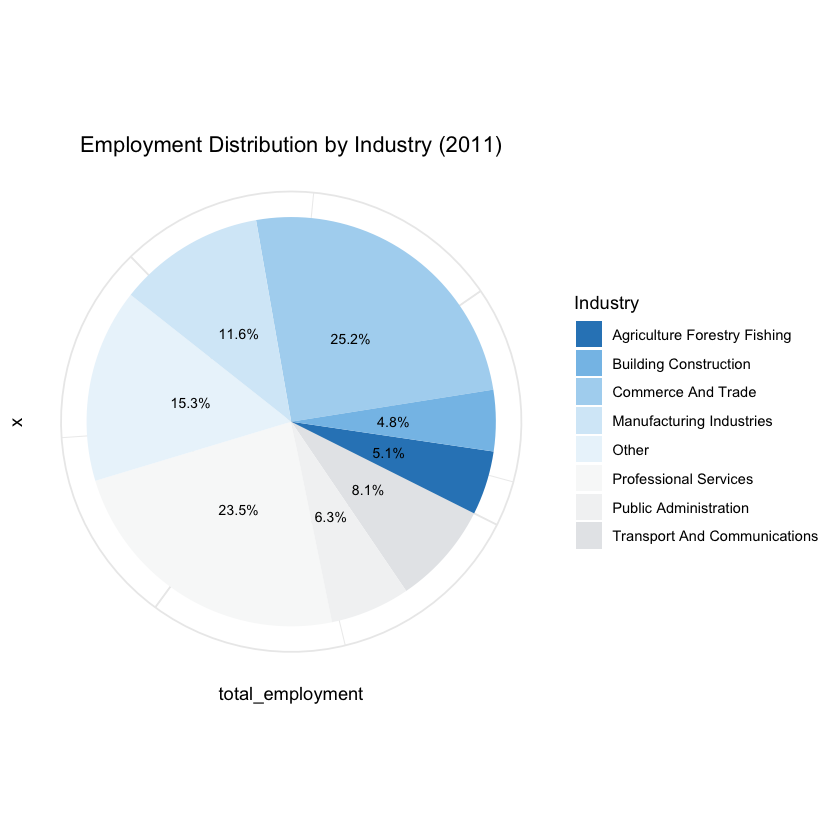

In [34]:
# Analysis of most employed sectors
data_2011 <- df_long %>% filter(Year == 2011)
industry_summary <- data_2011 %>% 
  group_by(Industry) %>% 
  summarize(total_employment = sum(Count))

# Create visualisation of employment distribution by industry
ggplot(data = industry_summary %>% 
         mutate(percentage = total_employment/sum(total_employment) * 100) %>%
         arrange(desc(percentage)), 
       aes(x = "", y = total_employment, fill = Industry)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y", start = 90) +
  geom_text(aes(label = paste0(round(percentage, 1), "%")),
            position = position_stack(vjust = 0.5),
            check_overlap = TRUE,
            size = 3) +
  scale_fill_manual(values = c("#2E86C1", "#85C1E9", "#AED6F1", "#D6EAF8", "#EBF5FB", "#F8F9F9", "#F2F3F4", "#E5E7E9")) +
  ggtitle("Employment Distribution by Industry (2011)") +
  labs(fill = "Industry") +
  theme_minimal() +
  theme(axis.text = element_blank(),
        plot.title = element_text(hjust = 0.5))


**What This Tells Us** 📝
- Most people worked in the Commerce and Trade industry, followed by Professional Services
- The smallest industry was Building and Construction, followed by Agriculture
- The distribution helps us understand which sectors were the major employers in 2011


### Key Finding 2: Gender Balance in the Workplace 👩‍💼👨‍💼
One aspect that particularly interested me was gender balance across industries. Were some sectors more balanced than others?

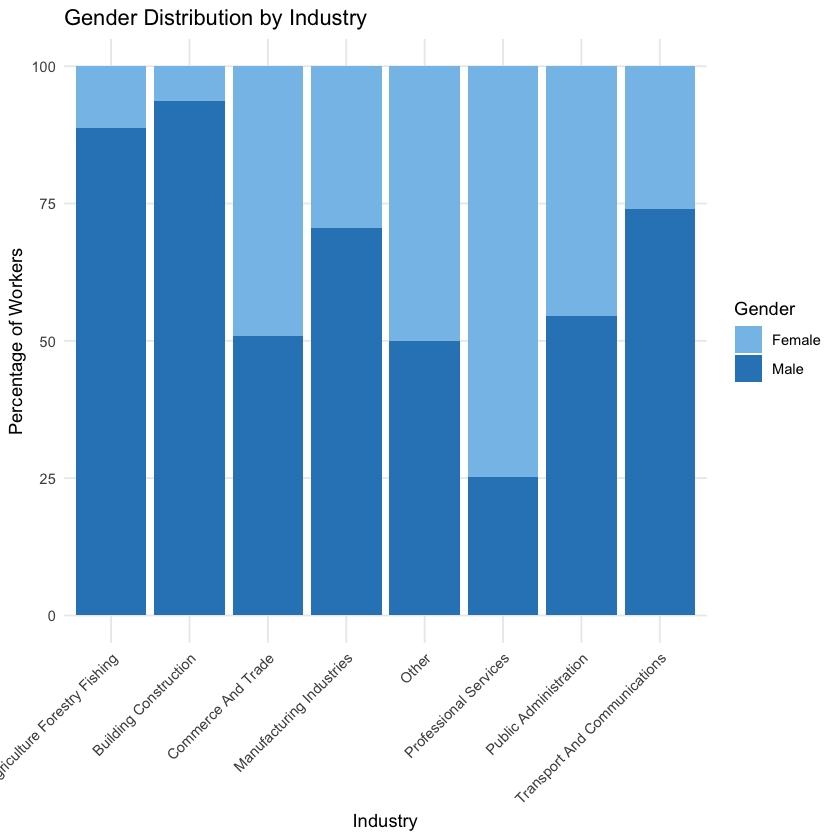

In [35]:
# Filtering the data for 2011 and calculating gender distribution
grouped_data_gender <- df_long %>% 
  group_by(Industry, Gender) %>% 
  summarize(total_count = sum(Count)) %>%
  group_by(Industry) %>% 
  mutate(percent = total_count / sum(total_count) * 100)

# Create visualization comparing employment distribution between genders
# Using stacked bar charts to show gender proportions in each industry
ggplot(grouped_data_gender, aes(x = Industry, y = percent, fill = Gender)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = c("#85C1E9", "#2E86C1")) +
  labs(title = "Gender Distribution by Industry",
       x = "Industry",
       y = "Percentage of Workers") +
  theme_minimal() +  
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    panel.grid.minor = element_blank()
  )

# The barplot shows that Building and Construction had the greatest gender imbalance in 2011


**What The Data Reveals** 🔍
- Building and Construction is heavily male-dominated
- Professional Services has a higher female representation
- Gender disparities vary significantly across industries


### Key Finding 3: A Tale of Two Regions 🏘️
Next, I wanted to understand how employment patterns differed between cities and rural areas. Does location matter when it comes to job opportunities?

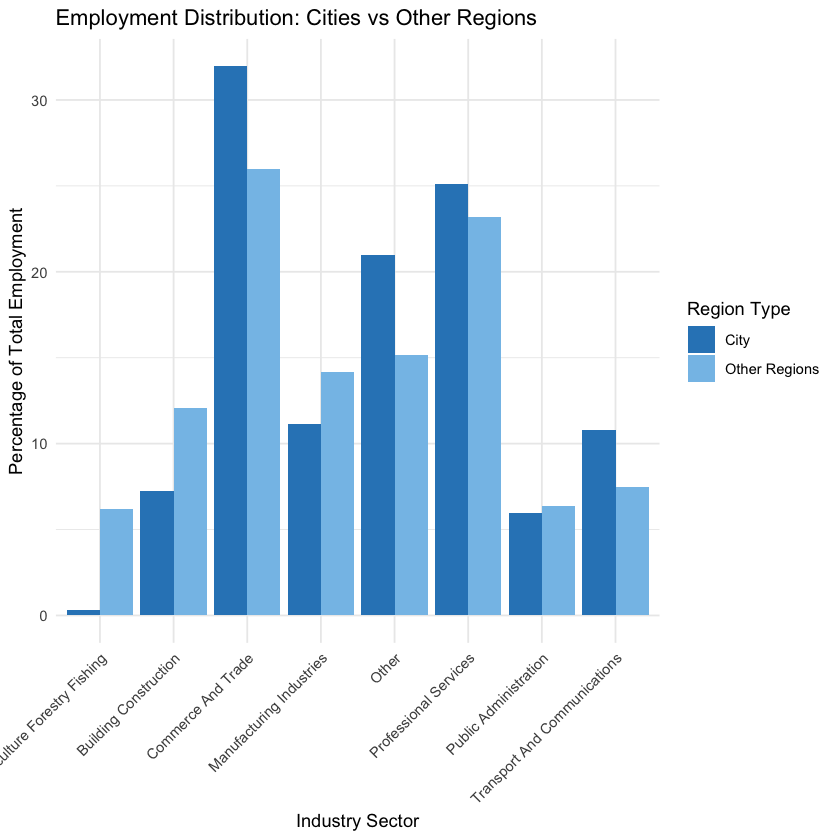

In [36]:
# This code creates a new binary variable that indicates whether the county in each row of
# the df_long data frame contains the word "City". The mutate function creates a new variable
# that contains "True" or "False" depending on if the County is a city or not.
df_long_2 <- df_long %>%
  mutate(Is_City = grepl("City", County, ignore.case = TRUE))

# Calculate percentages for each region type
city_summary <- df_long_2 %>%
  filter(Is_City == TRUE) %>%
  group_by(Industry, Year) %>%
  summarise(Total = sum(Count)) %>%
  group_by(Year) %>%
  mutate(Percentage = (Total / sum(Total)) * 100) %>%
  mutate(Region_Type = "City")

other_regions_summary <- df_long_2 %>%
  filter(Is_City == FALSE) %>%
  group_by(Industry, Year) %>%
  summarise(Total = sum(Count)) %>%
  group_by(Year) %>%
  mutate(Percentage = (Total / sum(Total)) * 100) %>%
  mutate(Region_Type = "Other Regions")

# Combine the data
regional_comparison <- rbind(city_summary, other_regions_summary)

# Create visualization
ggplot(regional_comparison, 
       aes(x = Industry, y = Percentage, fill = Region_Type)) +
  geom_bar(stat = "identity", position = "dodge") +
  scale_fill_manual(values = c("#2E86C1", "#85C1E9")) +
  labs(title = "Employment Distribution: Cities vs Other Regions",
       x = "Industry Sector",
       y = "Percentage of Total Employment",
       fill = "Region Type") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

**City vs Country: What's Different?** 🌆
- Cities have a larger share of employment in Commerce and Trade and Professional Services
- Other regions dominate employment in Agriculture Forestry Fishing and Building Construction
- Employment distribution between cities and other regions varies significantly by industry sector

### Key Finding 4: Time for Change? ⏰
Finally, I wanted to understand how employment patterns changed between 2006 and 2011. Which industries grew or declined during this challenging economic period?

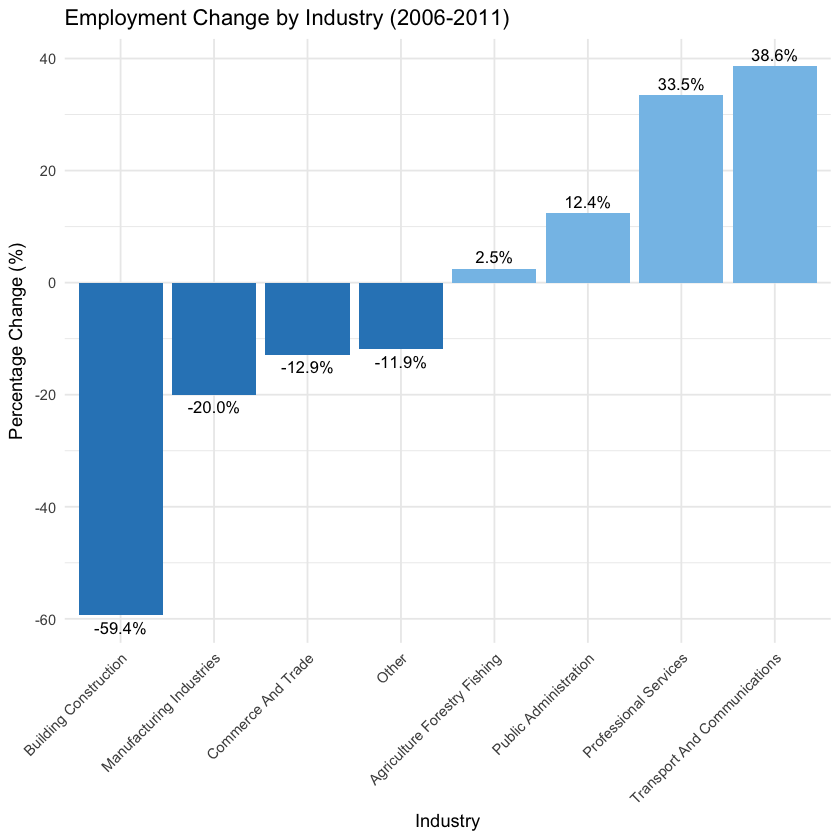

In [37]:
# Calculate employment change between 2006 and 2011
industry_change <- df_long %>%
  group_by(Industry, Year) %>%
  summarise(total_employment = sum(Count)) %>%
  pivot_wider(names_from = Year, 
              values_from = total_employment,
              names_prefix = "Year_") %>%
  mutate(percent_change = ((Year_2011 - Year_2006) / Year_2006) * 100)

# Create visualization
ggplot(industry_change, aes(x = reorder(Industry, percent_change), y = percent_change)) +
  geom_bar(stat = "identity", 
          aes(fill = percent_change >= 0)) +
  scale_fill_manual(values = c("#2E86C1", "#85C1E9")) +
  labs(title = "Employment Change by Industry (2006-2011)",
       x = "Industry",
       y = "Percentage Change (%)",
       fill = "Growth") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        legend.position = "none") +
  geom_text(aes(label = sprintf("%.1f%%", percent_change),
                vjust = ifelse(percent_change >= 0, -0.5, 1.5)),
            size = 3.5)

**Making Progress** 💪
- Transport and Communications & Professional Services showed resilience despite the economic downturn
- Building and Construction saw the most significant decline

### Bringing It All Together 🎯
My analysis revealed several key themes:
1. **Industry Distribution**: Commerce and Trade dominated employment, while Building and Construction showed significant vulnerability
2. **Gender Imbalance**: Stark differences exist in gender representation across sectors, particularly in construction
3. **Regional Patterns**: Cities and rural areas show distinct employment profiles and sector concentrations
4. **Sector Evolution**: Different industries showed varying levels of resilience during 2006-2011

### What's Next? 🚀
This analysis opens up several interesting questions for future research:
- How did these employment patterns evolve after 2011?
- What initiatives might help address gender imbalances in certain sectors?
- How do employment patterns vary across other regions of Ireland?
- What additional factors might influence employment distribution?
- How could this analysis inform future employment policy?

*This project was completed as part of my Data Analytics coursework at university.*
